<h1> Entrega Relatório Final: Grupo 3 <h1/>
     
<h4>Gabriel de Almeida Miki  <b>nUSP: 11802760 </b></h4>
<h4>Lucas Zem Berbert        <b>nUSP: 11802590 </b></h4>
<h4>Pietro Vishnevsky Cosimo <b>nUSP: 11802781 </b></h4>
<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;text-align: center; vertical-align:middle;">
    <h3>Problema proposto</h3>
</div>

<p> <img src = "Problema4.png"> </p>

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;text-align: center; vertical-align:middle;">
    <h3>1. Teoria</h3>
</div>

<h4> <b> <em> 1.1 Sistemas Sobredeterminados </em> </b> </h4>

<p> Um sistema linear sobredeterminado com $ m $ equações e $ n $ incógnitas, onde $ m > n $, é uma equação da forma: </p>

<p style = "text-align: center;"> $ Ax = b $ </p>

<p> Onde são dados a matrix $ m x n $ dos coeficientes $ A $ e o vetor $ b \in \mathbb{R}_{m} $, e deseja-se obter $ x \in \mathbb{R}_{n} $ que satisfaz a equação acima. </p>

<p> A matrix $ A $ pode ser associada a uma transformação linear entre os espaços $ \mathbb{R}_{n} $ e $ \mathbb{R}_{m} $, logo sua imagem tem dimensão de no máximo $ n $ e é portanto um subspaço de $ \mathbb{R}_{m} (m > n) $. Como $ b \in \mathbb{R}_{m} $, este vetor não estará, em geral, na imagem de $ A $ e, portanto, não existirá $ x \in \mathbb{R}_{n} $ tal que $ Ax = b $. </p>

<p style = "text-align: center;"> <img src = "bNaoEmA2.png"> </p>

<p> Uma maneira de lidar com essa dificuldade é determinar o vetor da imagem de $ A $ mais próximo de $ b $. </p>

<h4> <b> <em> 1.2 Mínimos Quadrados </em> </b> </h4>

<p> Determinar $ \bar{x} \in \mathbb{R}_{m} $ tal que: </p>

<p style = "text-align: center;"> $ \| b - A \bar{x} \| \le \| b - Ax \| $, para todo $ x \in \mathbb{R}_{n} $ </p>

<p> Onde $ \| b - Ax \| $ é a distância Euclideana, ou seja: </p>

<p style = "text-align: center;"> $ \| b - Ax \| = \sqrt{\sum_{i=1}^{m}[b_{i} - (Ax)_{i}]^2} $ </p>

<p> Geometricamente, esta nova formulação significa determinar $ \bar{x} $ tal que $ A \bar{x} $ é igual a projeção ortogonal de $ b $ sobre a imagem de $ A $, este problema sempre tem solução e, se as colunas de $ A $ forem vetores linearmente independentes do $ \mathbb{R}_{m} $, então a solução é única. </p>

<p style = "text-align: center;"> <img src = "projecao.png"> </p>

<p> Esta nova formulação estende o conceito de soluçãao de um sistema linear. Ela é chamada de solução no sentido de mínimos quadrados, pois ela minimiza o erro quadrático. </p> 

<hr>

<div style = "border: 2px solid black; padding: 10px; color: black; background-color: white;text-align: center; vertical-align:middle;">
    <h3>2. Abordagem e Código</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
class examinaChapa():
    
    def __init__(self):
        self._c = np.ones((7))
    
        self._dados1 = np.reshape(np.array((list(pd.read_fwf("casoBprova.txt").columns))), (55, 1))
        self._dados2 = np.reshape(np.array((list(pd.read_fwf("casoB_dados2.txt").columns))), (55, 1))
        
        self._l1 = self._dados1[0].astype('float64')
        self._l2 = self._dados2[0].astype('float64') 
        
        self._lambda1 = self._dados1[1:4].astype('float64')
        self._lambda2 = self._dados2[1:4].astype('float64')    
        
        self._E1 = self._dados1[4:].astype('float64')
        self._E2 = self._dados2[4:].astype('float64')
        
        self._matrixCoeficientes = []
        self._solution = []
        self._residuals = []
        
    def reset(self):
        self._c = np.ones((7))
    
        self._E_dados1 = np.reshape(np.array((list(pd.read_fwf("casoBprova.txt").columns))), (55, 1))
        self._E_dados2 = np.reshape(np.array((list(pd.read_fwf("casoB_dados2.txt").columns))), (55, 1))
        
        self._l1 = self._dados1[0].astype('float64')
        self._l2 = self._dados2[0].astype('float64')        
        
        self._lambda1 = self._dados1[1:4].astype('float64')
        self._lambda2 = self._dados2[1:4].astype('float64')        
        
        self._E1 = self._dados1[4:].astype('float64')
        self._E2 = self._dados2[4:].astype('float64')
        
        self._matrixCoeficientes = []
        self._solution = []
        self._residuals = []
        
    def setMatrixCoeficientes(self, totalPontos, comprimento, lambdaValor):
        xPosicoes = np.linspace(0, comprimento, num = totalPontos)
        self._matrixCoeficientes = np.ones((xPosicoes.shape[0], self._c.shape[0]))
        
        for linha in range(xPosicoes.shape[0]):
            for coluna in range(len(self._c)):
                if coluna == 0:
                    self._matrixCoeficientes[linha, coluna] = 1

                else:
                    if coluna % 2 == 0:
                        self._matrixCoeficientes[linha, coluna] = np.sin((2 * math.pi * xPosicoes[linha]) / lambdaValor[(coluna // 3)])
                    else:
                        self._matrixCoeficientes[linha, coluna] = np.cos((2 * math.pi * xPosicoes[linha]) / lambdaValor[(coluna // 3)])
                        
    def solveProblem(self, expessuraArray):        
        self._c, self._residuals, _, _ = np.linalg.lstsq(self._matrixCoeficientes, expessuraArray, rcond = None)                     

    def plotSolution(self, totalPontos, comprimento, lambdaValor, expessuraArray):
        xPosicoes = np.linspace(0, comprimento, num = totalPontos)
        self._solution = np.zeros((xPosicoes.shape[0]))

        for linha in range(xPosicoes.shape[0]):
            for coluna in range(self._c.T.shape[1]):
                if coluna == 0:
                    self._solution[linha] += self._c.T[0][coluna]
            
                else:
                    if coluna % 2 == 0:
                        self._solution[linha] += (self._c.T[0][coluna] * np.sin((2 * math.pi * xPosicoes[linha]) / lambdaValor[(coluna // 3)]))
                    else:
                        self._solution[linha] += (self._c.T[0][coluna] * np.cos((2 * math.pi * xPosicoes[linha]) / lambdaValor[(coluna // 3)]))
                        
        plt.figure(figsize = (20, 10))
        plt.title(("Assumindo um comprimento de " + str(comprimento[0]) + " para a viga, tem-se, a partir dos " + str(totalPontos) + " pontos medidos: "), fontweight = 800, fontsize = 17)
        
        plt.plot(xPosicoes, self._solution, color = 'lightgrey', linewidth = 3)
        plt.scatter(xPosicoes, expessuraArray, color = 'navy', s = 60, alpha = 0.55)
                
    def encontraDistribuicaoErro(self, expessuraArray):
        erros = np.zeros((expessuraArray.shape))
        
        for xPosicao in range(expessuraArray.shape[0]):
            erros[xPosicao] = math.sqrt((expessuraArray[xPosicao] - self._solution[xPosicao]) ** 2)
            
        plt.figure(figsize = (20, 10))
        plt.title(("Distribução dos erros quadráticos"), fontweight = 800, fontsize = 17)
        
        plt.hist(erros)
        
        plt.show()
        
        return np.mean(erros), np.std(erros)
    
    def plotErro(self, mediaDistribuicaoErro, stdDistribuicaoErro, sigma, comprimento, totalPontos, expessuraArray):
        xPosicoes = np.linspace(0, comprimento, num = totalPontos)
        
        desvioPadraoPos = np.zeros((expessuraArray.shape))
        desvioPadraoNeg = np.zeros((expessuraArray.shape))
        
        for xPosicao in range(expessuraArray.shape[0]):
            desvioPadraoPos[xPosicao] = self._solution[xPosicao] + (mediaDistribuicaoErro + (sigma * stdDistribuicaoErro))
            desvioPadraoNeg[xPosicao] = self._solution[xPosicao] - (mediaDistribuicaoErro + (sigma * stdDistribuicaoErro))
            
        plt.figure(figsize = (20, 10))
        plt.title(("Assumindo um comprimento de " + str(comprimento[0]) + " para a viga, tem-se, a partir dos " + str(totalPontos) + " pontos medidos: "), fontweight = 800, fontsize = 17)
        
        plt.plot(xPosicoes, self._solution, color = 'lightgrey', linewidth = 3)
        plt.scatter(xPosicoes, expessuraArray, color = 'navy', s = 60, alpha = 0.55)
        
        plt.plot(xPosicoes, desvioPadraoPos, linestyle = '--', color = "red", linewidth = 2, alpha = 0.4, label = (str(sigma) + " std"))
        plt.plot(xPosicoes, desvioPadraoNeg, linestyle = '--', color = "red", linewidth = 2, alpha = 0.4)
        
        plt.legend()
        
        plt.show()

<hr>

<h4> <b> <em> 2.1 Resolução primeiro conjunto de Dados </em> </b> </h4>

In [383]:
resolucaoDados1 = examinaChapa()

In [384]:
resolucaoDados1.reset()

resolucaoDados1.setMatrixCoeficientes(51, x._l1, x._lambda1)

<AxesSubplot:title={'center':'Matrix dos Coeficientes (A)'}>

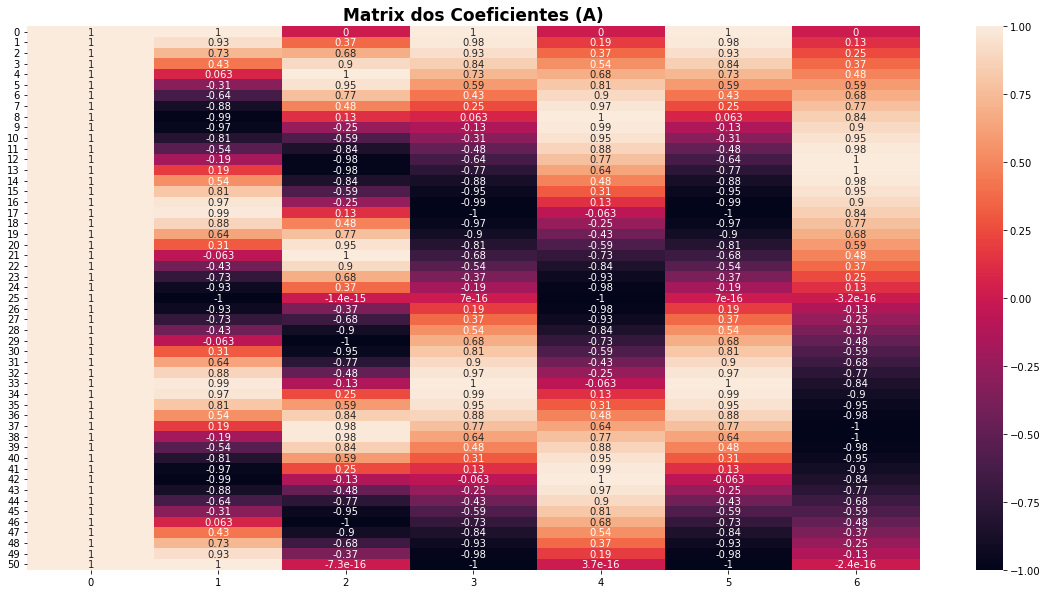

In [385]:
plt.figure(figsize = (20, 10))
plt.title("Matrix dos Coeficientes (A)", fontweight = 800, fontsize = 17)
sns.heatmap(resolucaoDados1._matrixCoeficientes, annot = True)

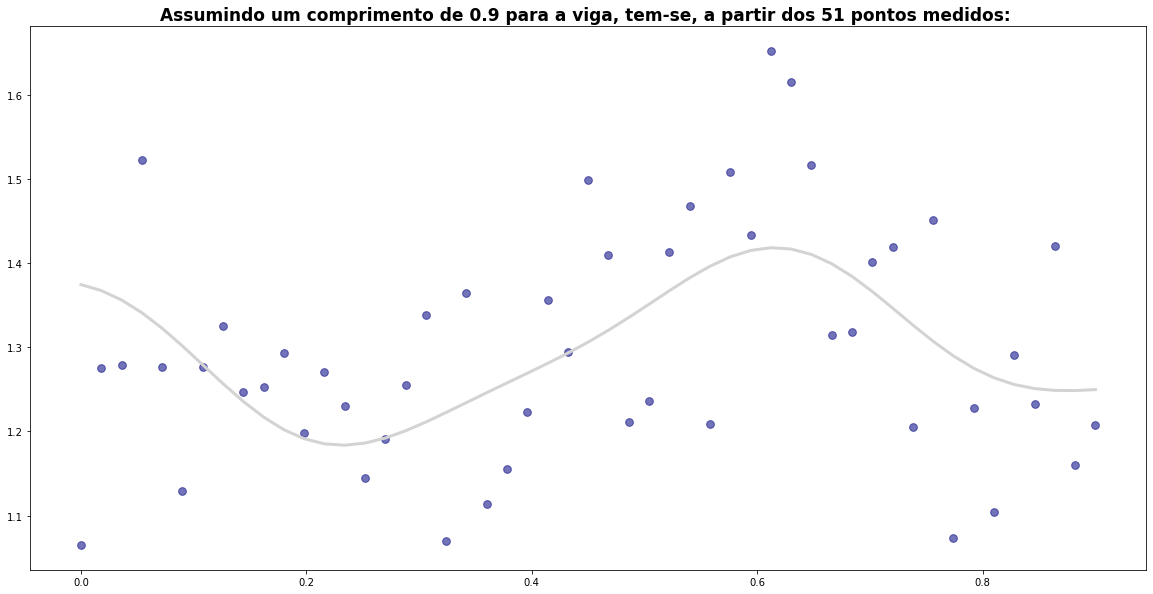

In [386]:
resolucaoDados1.solveProblem(x._E1)

resolucaoDados1.plotSolution(51, x._l1, x._lambda1, x._E1)

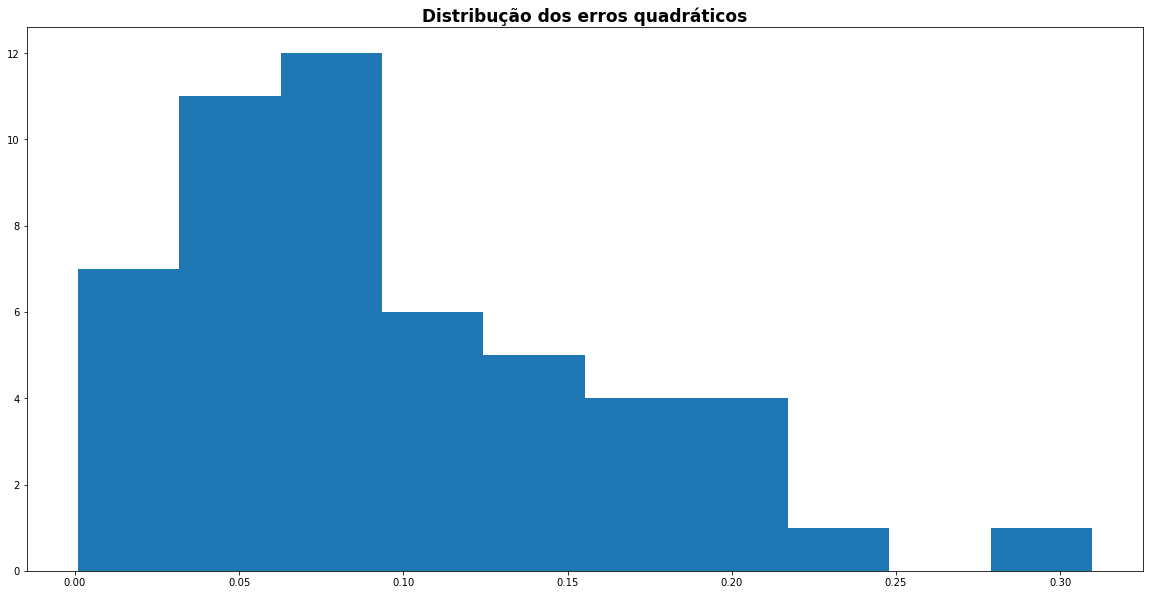

In [387]:
mediaDistribuicaoErro1, stdDistribuicaoErro1 = resolucaoDados1.encontraDistribuicaoErro(resolucaoDados1._E1)

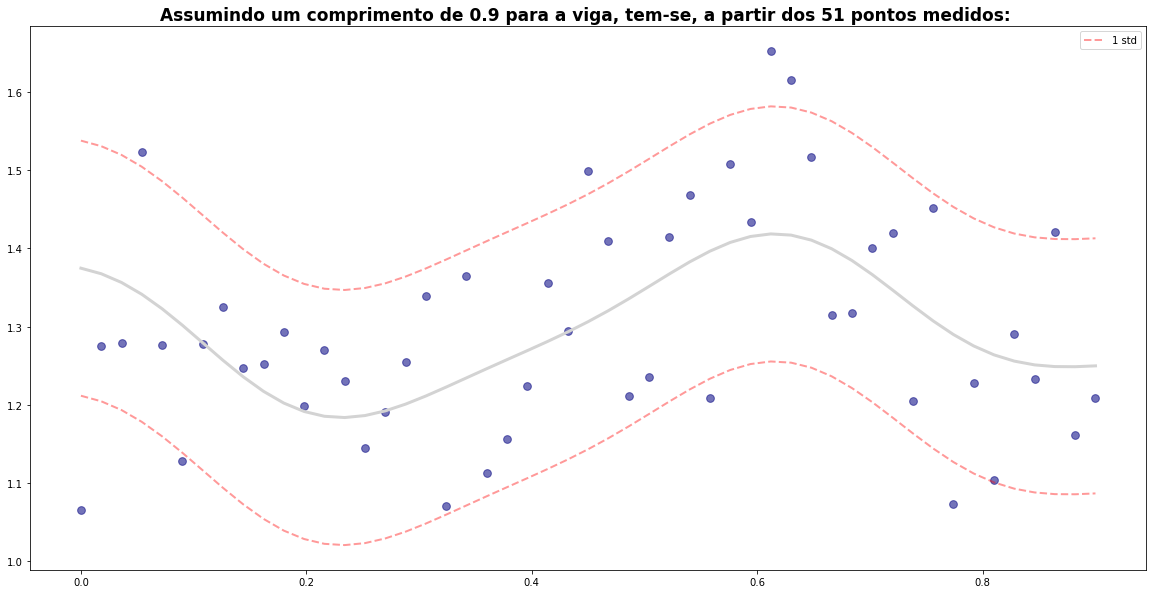

In [400]:
resolucaoDados1.plotErro(mediaDistribuicaoErro1, stdDistribuicaoErro1, 1, resolucaoDados1._l1, 51, resolucaoDados1._E1)

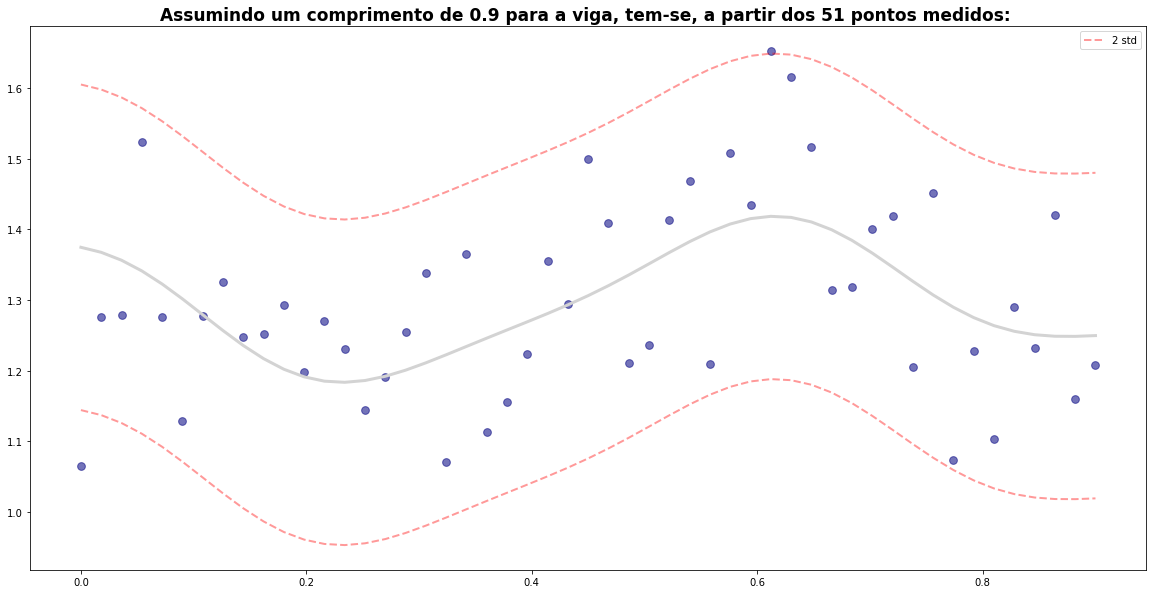

In [403]:
resolucaoDados1.plotErro(mediaDistribuicaoErro1, stdDistribuicaoErro1, 2, resolucaoDados1._l1, 51, resolucaoDados1._E1)

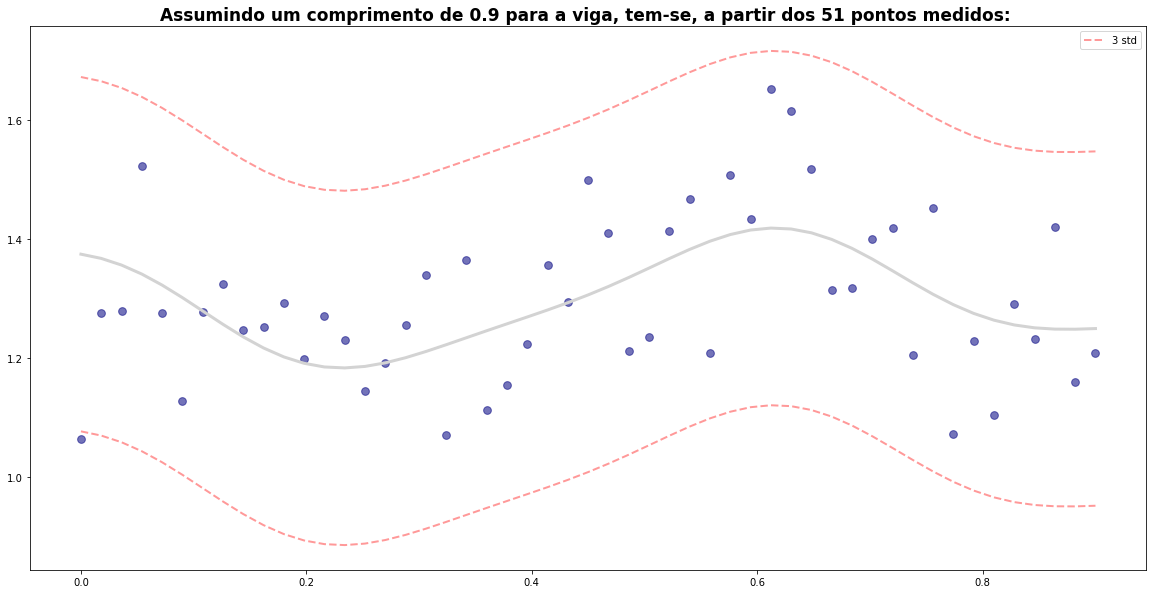

In [404]:
resolucaoDados1.plotErro(mediaDistribuicaoErro1, stdDistribuicaoErro1, 3, resolucaoDados1._l1, 51, resolucaoDados1._E1)

<hr>

<h4> <b> <em> 2.2 Resolução segundo conjunto de Dados </em> </b> </h4>

In [390]:
resolucaoDados2 = examinaChapa()

In [391]:
resolucaoDados2.reset()

resolucaoDados2.setMatrixCoeficientes(51, x._l2, x._lambda2)

<AxesSubplot:title={'center':'Matrix dos Coeficientes (A)'}>

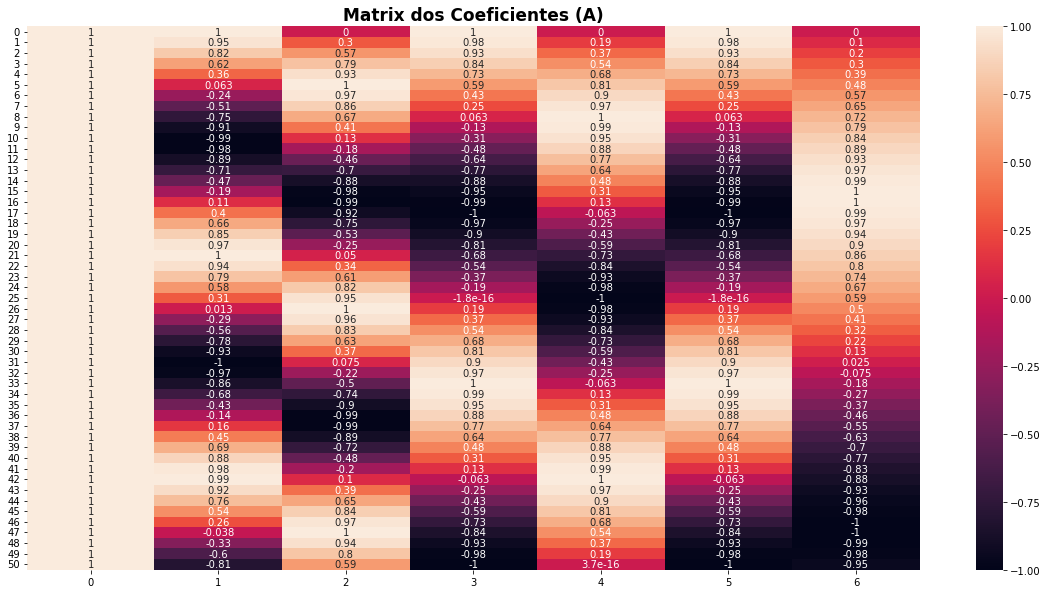

In [392]:
plt.figure(figsize = (20, 10))
plt.title("Matrix dos Coeficientes (A)", fontweight = 800, fontsize = 17)
sns.heatmap(resolucaoDados2._matrixCoeficientes, annot = True)

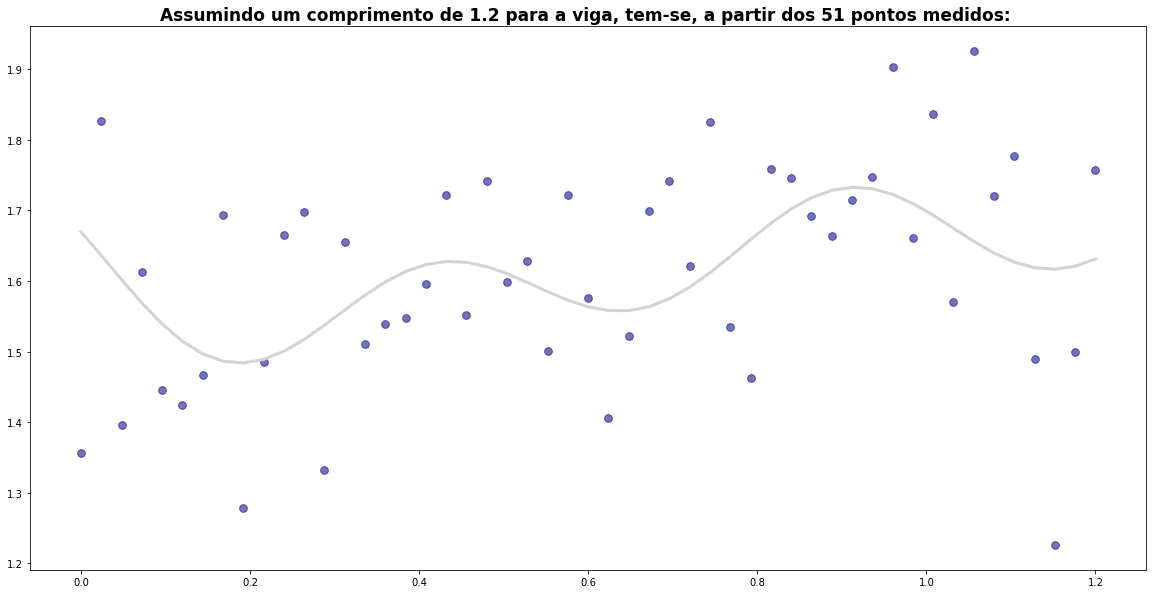

In [393]:
resolucaoDados2.solveProblem(x._E2)
# Adicionar erro!!
resolucaoDados2.plotSolution(51, x._l2, x._lambda2, x._E2)

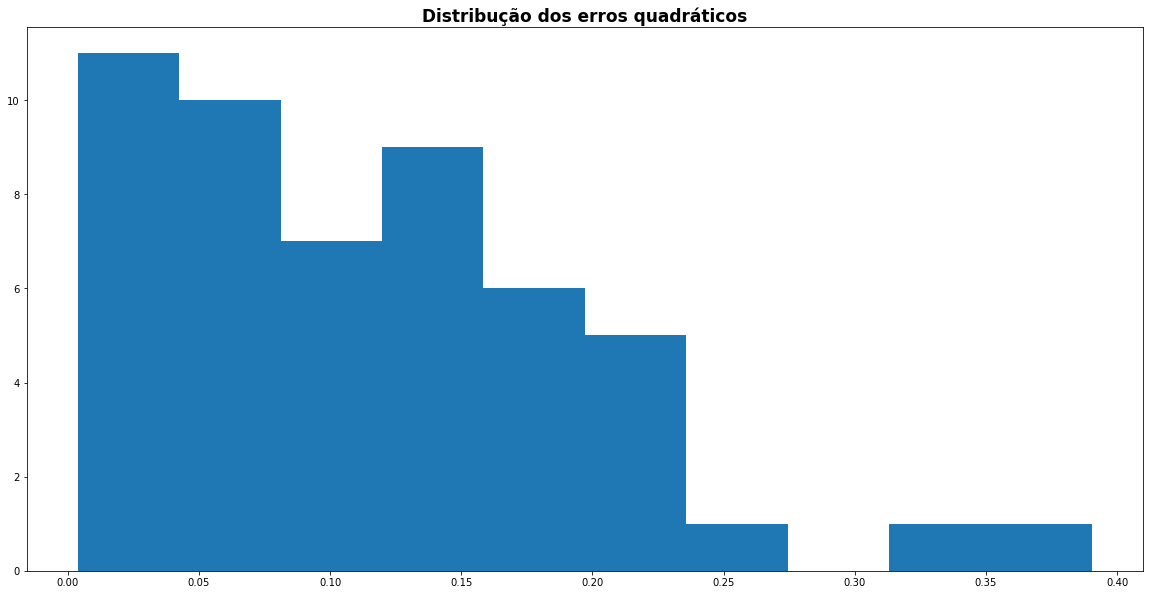

In [394]:
mediaDistribuicaoErro2, stdDistribuicaoErro2 = resolucaoDados2.encontraDistribuicaoErro(resolucaoDados2._E2)

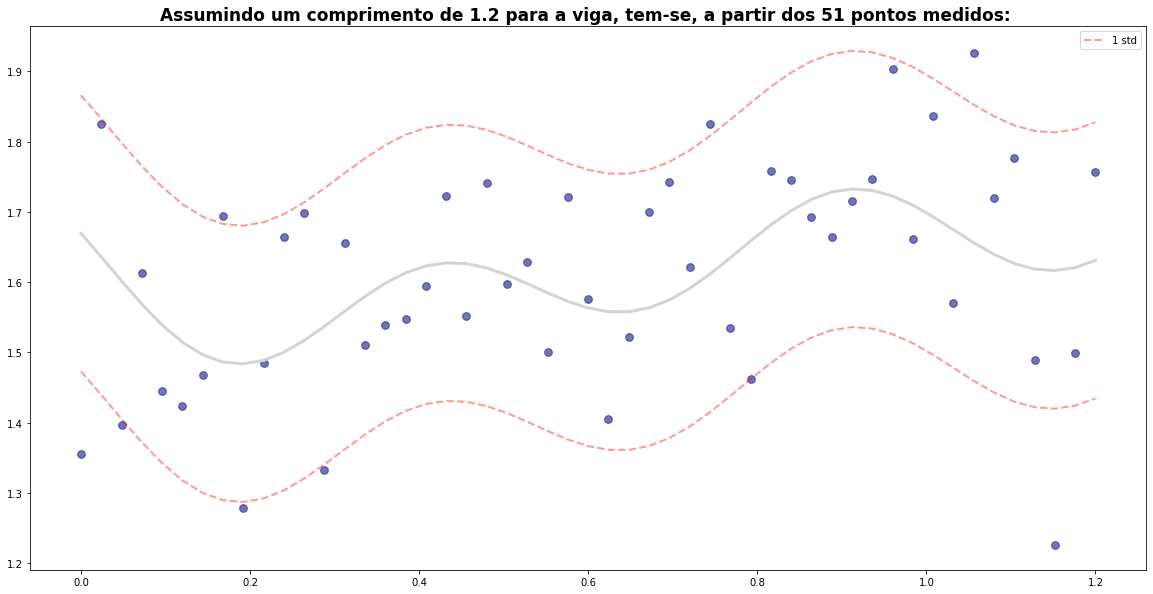

In [397]:
resolucaoDados2.plotErro(mediaDistribuicaoErro2, stdDistribuicaoErro2, 1, resolucaoDados2._l2, 51, resolucaoDados2._E2)

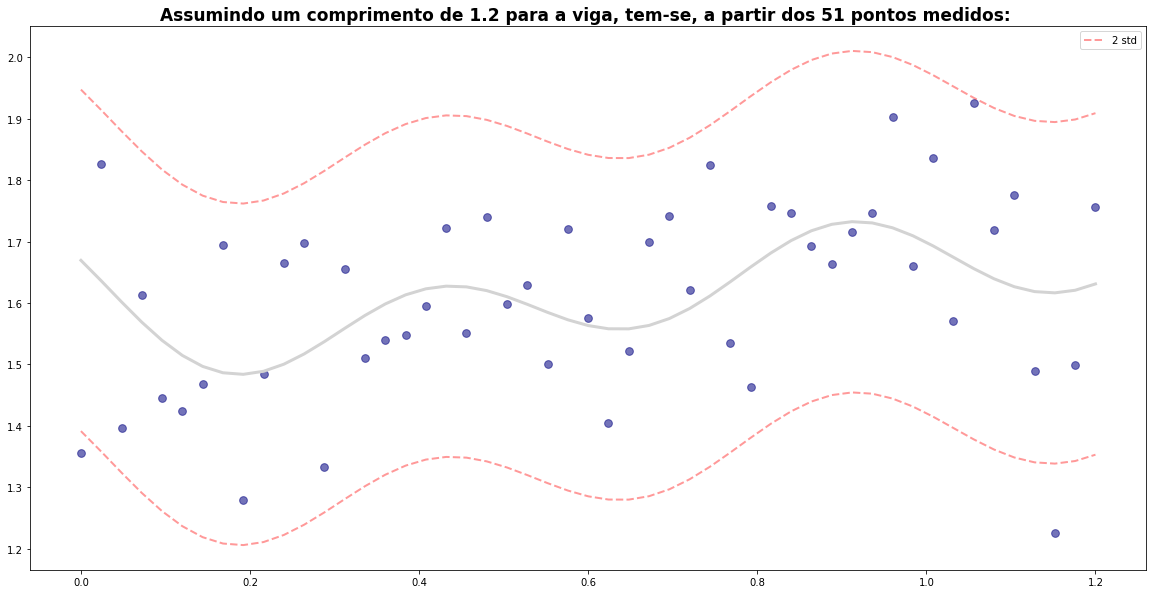

In [398]:
resolucaoDados2.plotErro(mediaDistribuicaoErro2, stdDistribuicaoErro2, 2, resolucaoDados2._l2, 51, resolucaoDados2._E2)

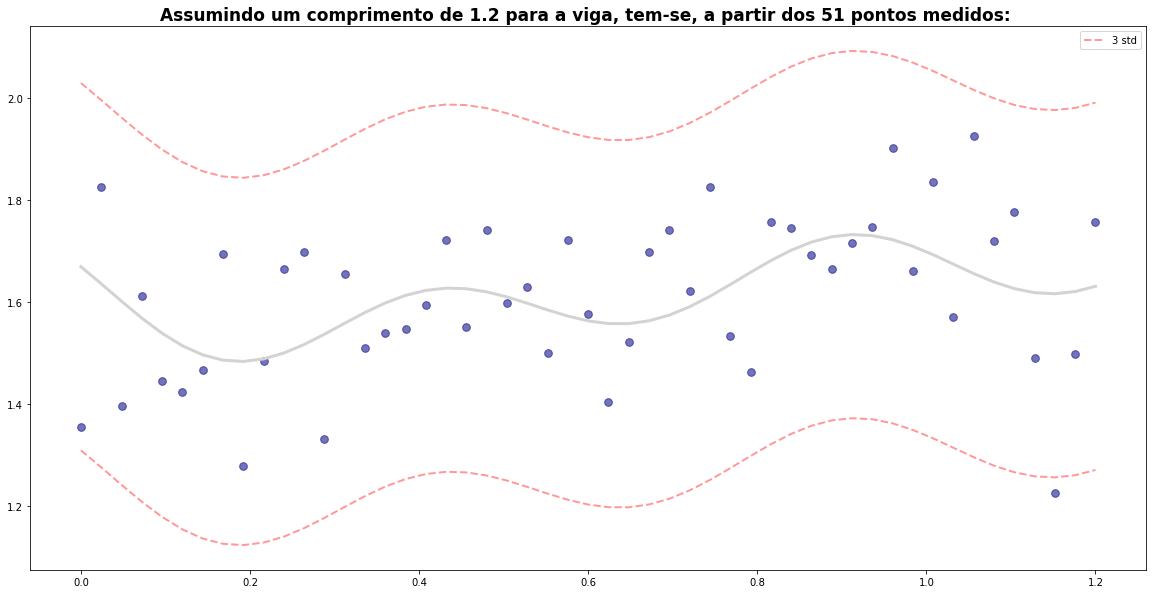

In [399]:
resolucaoDados2.plotErro(mediaDistribuicaoErro2, stdDistribuicaoErro2, 3, resolucaoDados2._l2, 51, resolucaoDados2._E2)

<hr>

<h4> <b> <em> 2.3 Resolução segundo conjunto de Dados </em> </b> </h4>

In [23]:
resolucaoProva = examinaChapa()

In [24]:
resolucaoProva.reset()

resolucaoProva.setMatrixCoeficientes(51, resolucaoProva._l1, resolucaoProva._lambda1)

<AxesSubplot:title={'center':'Matrix dos Coeficientes (A)'}>

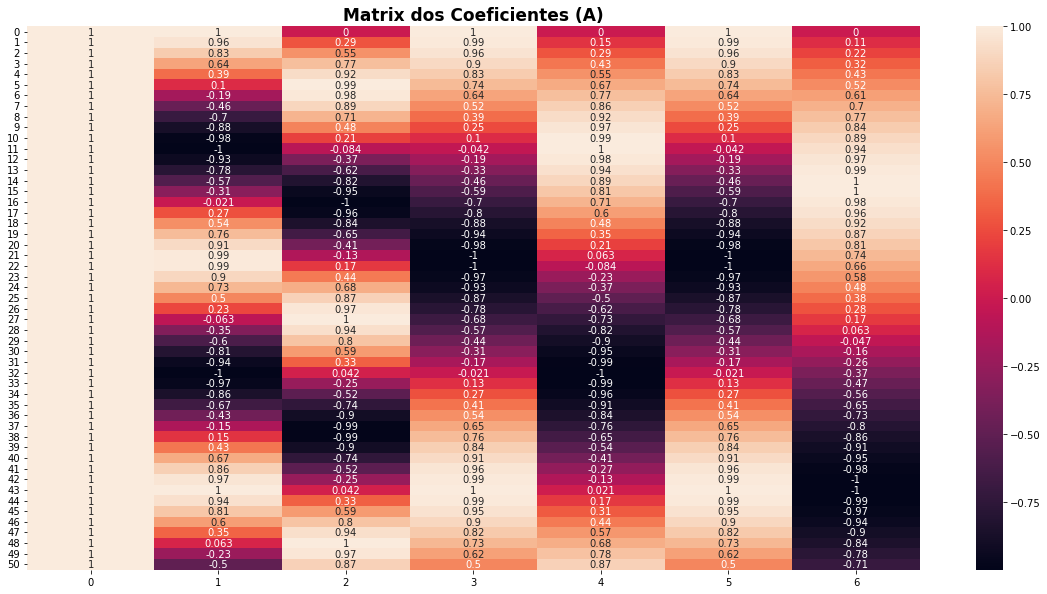

In [25]:
plt.figure(figsize = (20, 10))
plt.title("Matrix dos Coeficientes (A)", fontweight = 800, fontsize = 17)
sns.heatmap(resolucaoProva._matrixCoeficientes, annot = True)

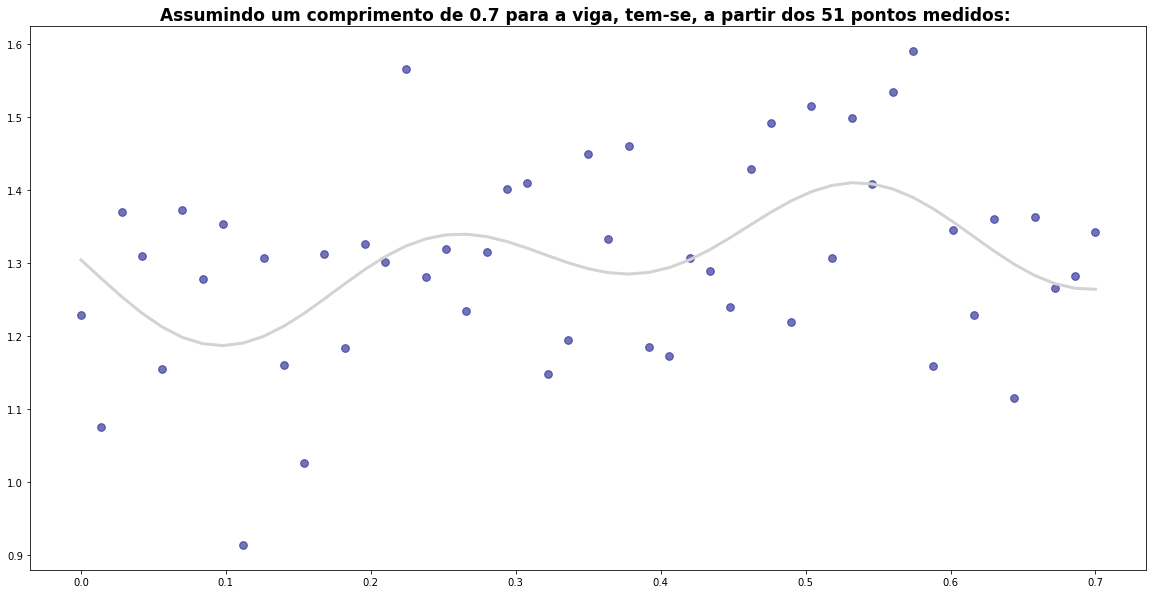

In [26]:
resolucaoProva.solveProblem(resolucaoProva._E1)

resolucaoProva.plotSolution(51, resolucaoProva._l1, resolucaoProva._lambda1, resolucaoProva._E1)

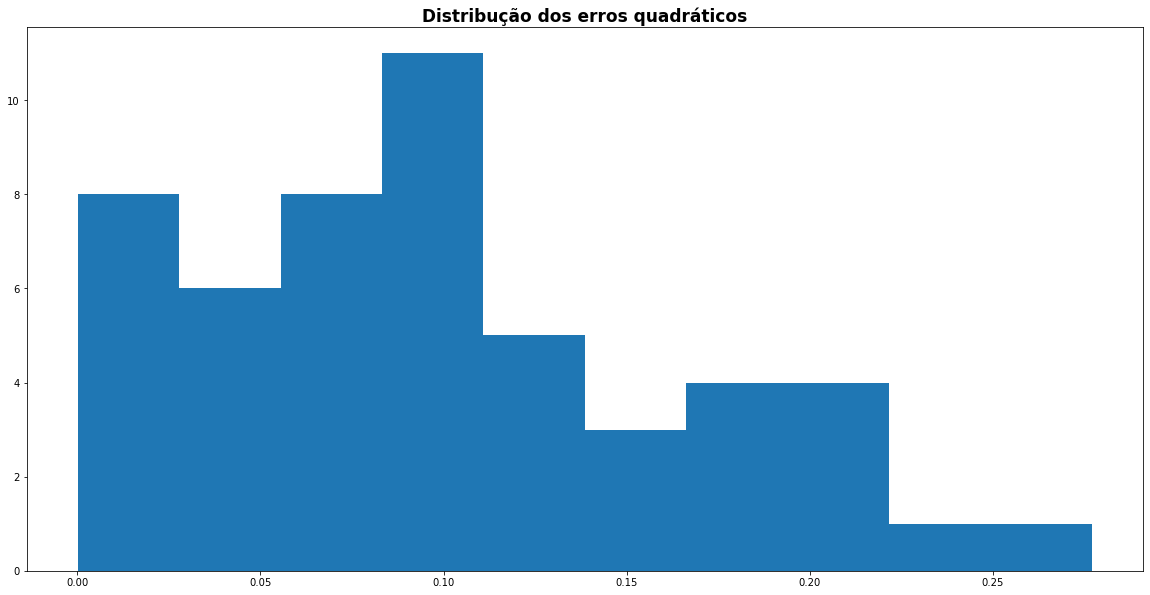

In [27]:
mediaDistribuicaoErroProva, stdDistribuicaoErroProva = resolucaoProva.encontraDistribuicaoErro(resolucaoProva._E1)

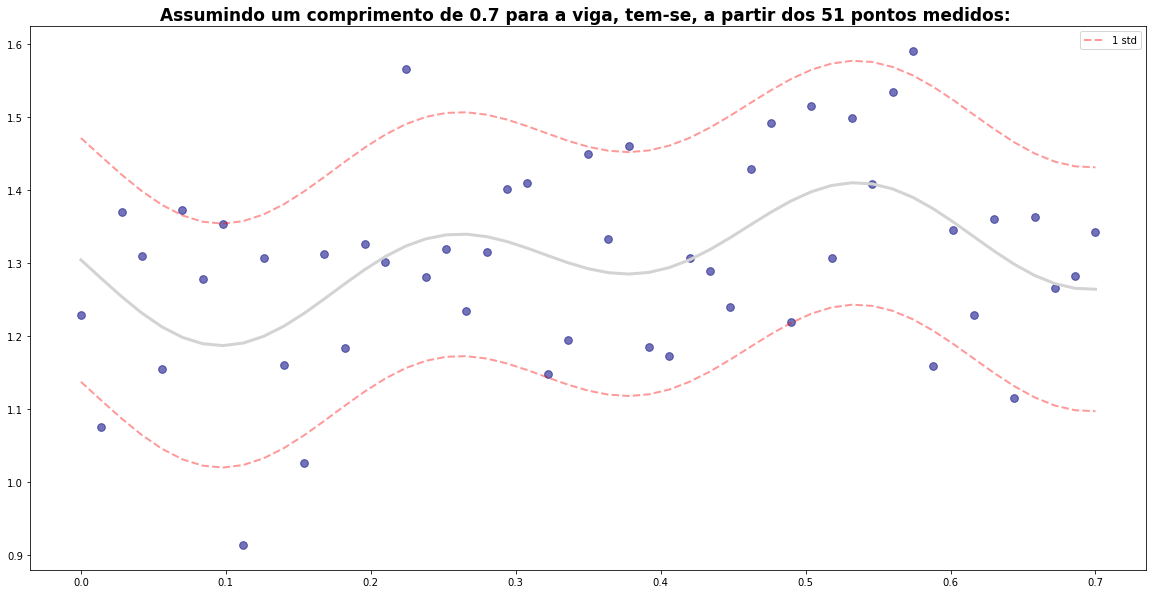

In [28]:
resolucaoProva.plotErro(mediaDistribuicaoErroProva, stdDistribuicaoErroProva, 1, resolucaoProva._l1, 51, resolucaoProva._E1)

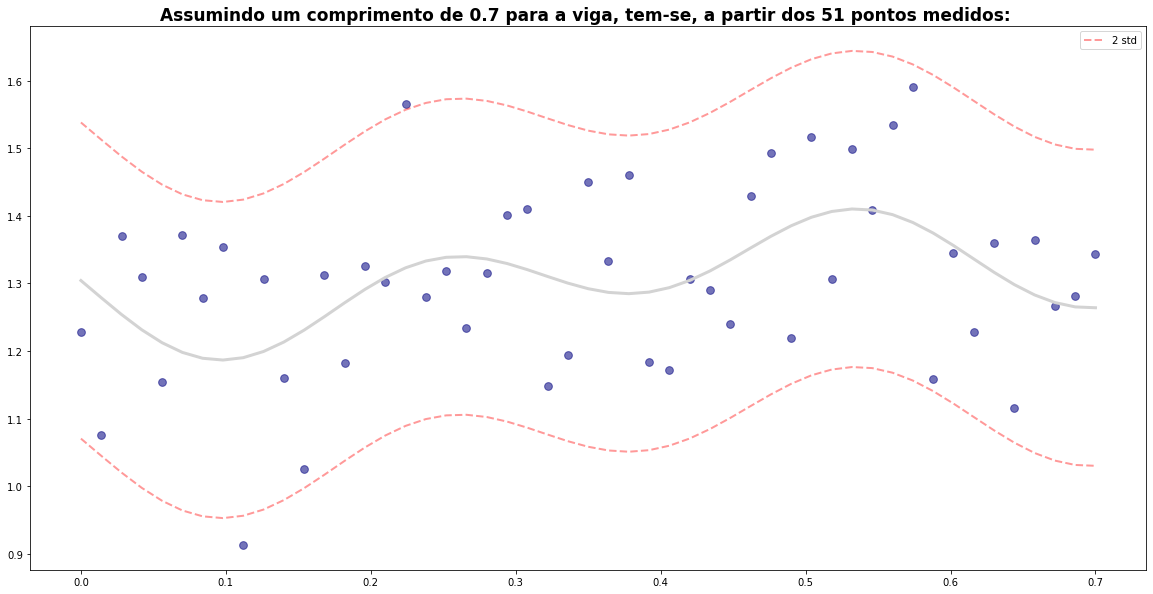

In [29]:
resolucaoProva.plotErro(mediaDistribuicaoErroProva, stdDistribuicaoErroProva, 2, resolucaoProva._l1, 51, resolucaoProva._E1)

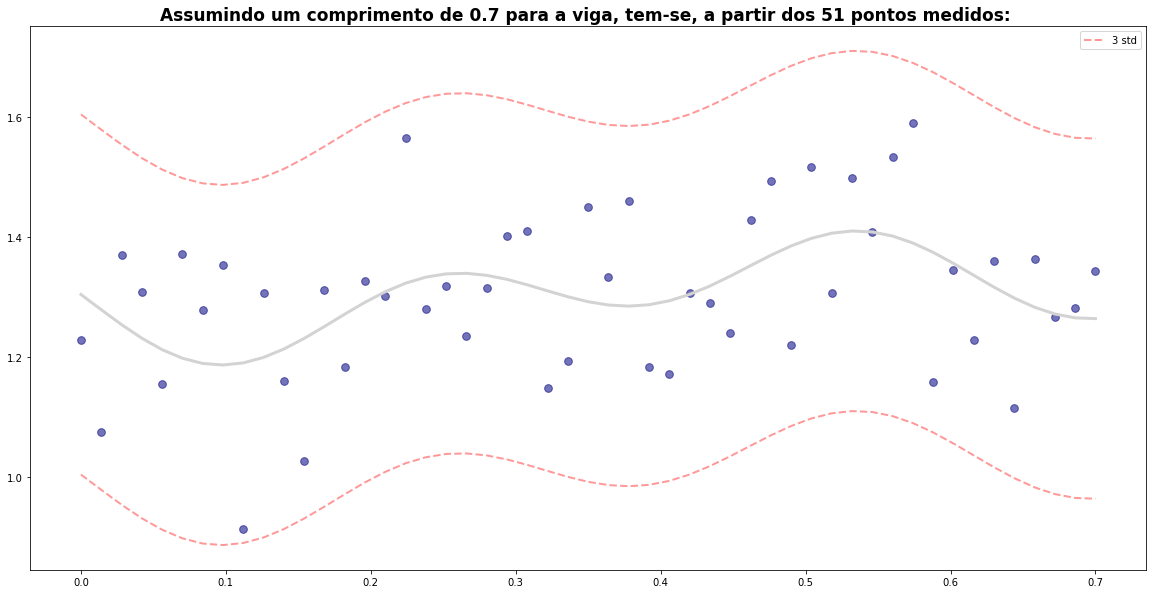

In [30]:
resolucaoProva.plotErro(mediaDistribuicaoErroProva, stdDistribuicaoErroProva, 3, resolucaoProva._l1, 51, resolucaoProva._E1)